# Supplementary (supporting) information

## Load in modules and analysis functions


In [2]:
from simulation import *
from aesthetics import *
from plot import *

import glob
import os as os
import re as re
import pandas as pd

%reload_ext autoreload
%autoreload 2
%matplotlib inline
mpl.rc('text', usetex=True)
cmap = sns.color_palette("Paired", 10)

## What is the effect of the diffusion coefficient on the values of flux we report?

First, here is the directional and reciprocating flux reported for a typical angle using `D = 3 * 10 ** 12 degree**2 per second` which is the default value specified in the class `Simulation`.

C                         +1.00e+06  second**-1
D                         +3.00e+12  degrees**2 second**-1
k_{cat}                   +3.12e+02  second**-1
[S]                       +2.50e-06  M         
dt                        +1.00e-12  second    
-------------------------
Intrasurface flux         -1.20e+00  cycle second**-1
Peak                      +2.19e-01  cycle second**-1


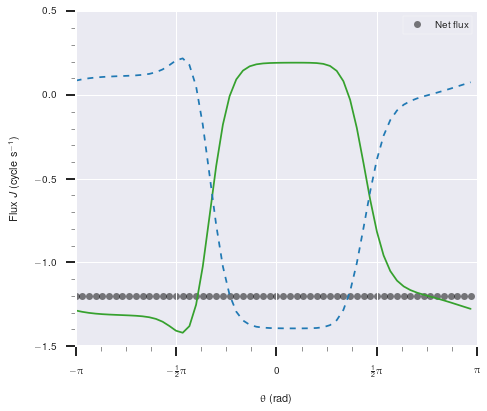

In [3]:
this = Simulation(data_source='adk_md_data')
this.name = 'chi2THR175'
this.simulate()
plot_flux(this)

We can increase the value of the diffusion coefficient by explicitly writing it before calling `simulate()`. If we increase the value of `D` to `3 * 10 ** 15 degree**2 per second`, then we see significant numerical noise. For example:

C                         +1.00e+06  second**-1
D                         +3.00e+15  degrees**2 second**-1
k_{cat}                   +3.12e+02  second**-1
[S]                       +2.50e-06  M         
dt                        +1.00e-15  second    
-------------------------
Intrasurface flux         -1.11e+00  cycle second**-1
Peak                      +2.20e-01  cycle second**-1


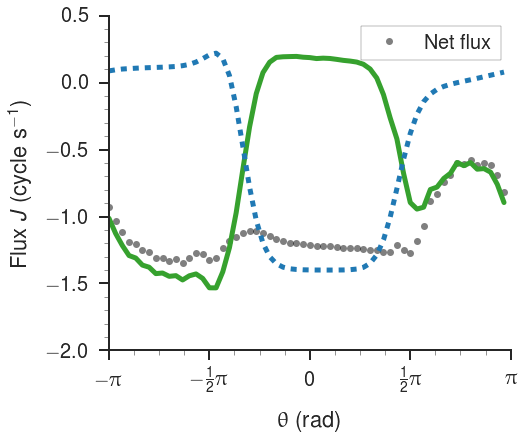

In [4]:
this = Simulation(data_source='adk_md_data')
this.name = 'chi2THR175'
this.D = 3 * 10 ** 15
this.simulate()
plot_flux(this)

The onset of noise can be see by plotting the directional flux as a function of the value of `D`. First, let's calculate the mean (for a given angle) of the directional flux as a function fo `D`.

In [38]:
powers_of_ten = np.arange(5, 15, 0.2)
mean_flux = np.zeros((len(powers_of_ten)))
for index, value in enumerate(powers_of_ten):
    this = Simulation(data_source='adk_md_data')
    this.name = 'chi2THR175'
    this.D = 3 * 10 ** value
    this.simulate()
    mean_flux[index] = np.mean(this.flux_u + this.flux_b)

/media/dslochower/data-beta/projects/nonequilibrium-manuscript/simulation.py:244: ComplexWarning: Casting complex values to real discards the imaginary part
  ss = abs(eigenvectors[:, self.eigenvalues.argmax()].astype(float))


(-1.5, 0.1)

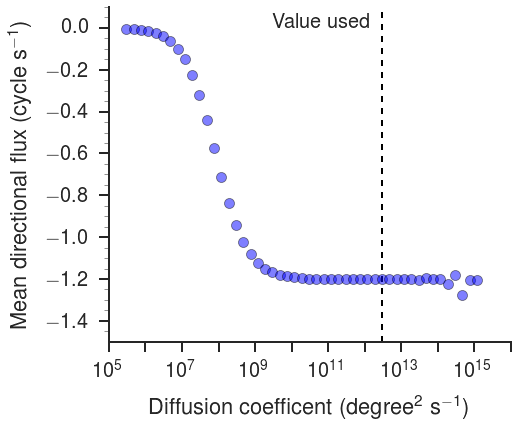

In [39]:
ax = generic_plot([3 * 10 ** i for i in powers_of_ten], mean_flux, 
                  xlabel='Diffusion coefficent (degree$^{{2}}$ s$^{{-1}}$)',
                 ylabel='Mean directional flux (cycle s$^{{-1}}$)')
ax.set_xscale('log')
ax.axvline(x=3e12, c='k', ls='--', zorder=-1, lw=2)
ax.annotate(r'Value used', xy=(3*10**12, 0.0), xytext=(3*10**9, 0.0), fontsize=20)
for label in ax.get_xticklabels()[::2]:
    label.set_visible(False)
ax.set_xlim([10**5, 10**16])
ax.set_ylim([-1.5, 0.1])

From about $10^{9}$ thorugh $10^{14}$, the results look stable.

## What is the effect of the bimolecular rate coefficient on the flux?

Like the diffusion coefficient, very high values of this parameter leads to numerical instability. Unlike the diffusion coefficient, this parameter is different for each system. For ADK, `C = 10 ** 6 per mole per second`.

In [40]:
powers_of_ten = np.arange(1, 14, 0.2)
mean_flux = np.zeros((len(powers_of_ten)))
for index, value in enumerate(powers_of_ten):
    this = Simulation(data_source='adk_md_data')
    this.name = 'chi2THR175'
    this.C_intersurface = 10 ** value
    this.simulate()
    mean_flux[index] = np.mean(this.flux_u + this.flux_b)

(-6, 1)

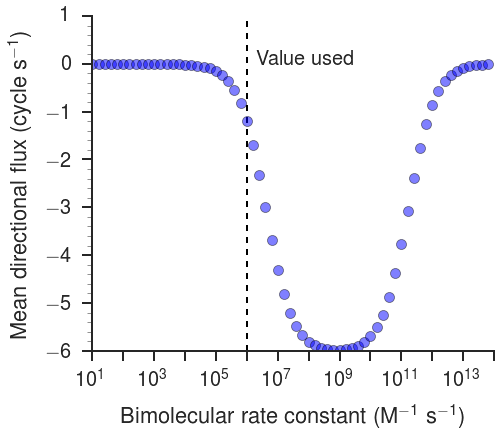

In [41]:
ax = generic_plot([10 ** i for i in powers_of_ten], mean_flux, 
                  xlabel='Bimolecular rate constant (M$^{{-1}}$ s$^{{-1}}$)',
                 ylabel='Mean directional flux (cycle s$^{{-1}}$)')
ax.set_xscale('log')
ax.axvline(x=1e6, c='k', ls='--', zorder=-1, lw=2)
ax.annotate(r'Value used', xy=(1e6, 0.0), xytext=(2e6, 0.0), fontsize=20)
for label in ax.get_xticklabels()[::2]:
    label.set_visible(False)
ax.set_xlim([10**1, 10**14])
ax.set_ylim([-6, 1])